<a href="https://colab.research.google.com/github/ItsYourNafiz/LungCancerDetection_EfficientNetB7/blob/main/Lung_Cancer_Detection_Using_EfficientNet_b7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'the-iqothnccd-lung-cancer-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1673681%2F2745085%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240808%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240808T152149Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D75c265084e2a4370246c2c097ac2391b7f6dc325e8748de368393e688c21bad815cf7456787931cb2fa337a27718b69af68bd7fe289df802f0f2f5eca7d17caaab86f4b30342503da70036d5355c303e2113f1fe2a12e7ade681ed5e331e27bce6158d5e2b31b875db3384b25a3778a2cb320929e7ef4d193438b242ae3aea182fdd68fe73d2978accf6dbd4bc076b8836a1bfbc35b329899aa688373e2fe4a7f42bb874e1124ad606c1981e5891158b6ee6f9542b7275f36bf400f0380084a338ec73ad5993a6e791d90490da00ed82c315b37ce5058fe404cd124a77b06a429d328547900e8b1658498edfdb494f0c1ed4f2f676c9f73a0eefab4fbbc94f7d,lungctscans4k:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3535980%2F6163317%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240808%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240808T152149Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D75cfc25bd597e8e47070ffb21c163a26b991c3d351ef964cebf6accc8d8608cd58e83f2d3264a88c07039c1fa1bddec16b4d1f8f06b009c1377287dad7b55ce5c84641cf610bf98533d6fbaf43dd8c75d74a2556179f66fd39b77b28057dd2d24f5be7436964f59d3b7247e1cab120ed876b3df93458d8f500bbd55441a0d79e95d30361e7629a975c67469cba0a66418a6e7f858fae1a62a3a485d9336f2c225fa9a2cdbfd12ad099f640899dc4e1e6dd6071c12e5f70b311775f465fa3b5c15f82259ee98ddb536946362079127873814568a1127d19c29e17659fbaa9902d1eb572bff1d9c4a3cd11f629924e5ab7e2c5bbf72472c9d58b4ac26ceb684606,lungcancer4types-imagedataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4276841%2F7362503%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240808%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240808T152149Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4a66953f6f8da2a8882caff14c51d678f8c85350a26962f1f9fc8c321e39cf3663c640fb88d58c17e5c95b081278d7391dc3d227b2875d2e505fc9c091a922eeefed4f3515024552827277da0c19744f6f6dfe58ce574ba602523e0e80b84754437666bca4839875f7ac3bcc3abea8eb546ee20ee826d2c6490da8d43022304af6726135dc1f126a0eb14f6e8091abf321f05a0a1a65f324499d55bfb6435afb82457a0c2123041d1ec545dc7263b16ab3e621ac2b8fd468c9632d2cacf3f1e189ca33cb2cff74c39ade4b084243a143502edd50a09823bf5bb5b15a711af49e7d795c1c38b87472390c5cf3e70d279ec80f33a2e96e1831dfb2240b04adbbfd'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 156694020 bytes downloaded
Downloaded and uncompressed: the-iqothnccd-lung-cancer-dataset
[==================================================] 458748113 bytes downloaded
Downloaded and uncompressed: lungctscans4k
[==================================================] 124379012 bytes downloaded
Downloaded and uncompressed: lungcancer4types-imagedataset
Data source import complete.


In [2]:
#Importing Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import glob
import os
from PIL import Image
from sklearn.preprocessing import label_binarize, LabelBinarizer
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import img_to_array, array_to_img    #instead of keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.metrics import auc, roc_curve, roc_auc_score
from tensorflow.keras import layers, activations, optimizers, losses, metrics, initializers

from tensorflow.keras.models import model_from_json
from tensorflow.keras.utils import to_categorical

In [3]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0


In [4]:
!pip install efficientnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.1 MB/s eta 0:00:00


In [5]:
dir_path = "/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset"

In [6]:
IMG_SHAPE = (256, 256)

#Create prepare_image method
#Used to preprocess the image for efficientNet model
def prepare_image(file):
    img = image.load_img(file, target_size=IMG_SHAPE)
    img_array = image.img_to_array(img)
    return tf.keras.applications.efficientnet.preprocess_input(img_array)

In [7]:
#Read the files from each dirctory
directories = os.listdir(dir_path) #Read the folders
print(directories)

['Malignant cases', 'Normal cases', 'Bengin cases']


In [8]:
files = [] #Save all images for each folder
labels = [] #Set for each image the name of it

#Read files for each directory
for folder in directories:
    fileList = glob.glob(dir_path + '/'+ folder + '/*')
    labels.extend([folder for l in fileList])
    files.extend(fileList)

In [9]:
print("Length of Files :", len(files))
print("Length of Labels :", len(labels))

Length of Files : 1097
Length of Labels : 1097


In [10]:
#Create two lists to hold only non-mask images and label for each one
selected_files = []
selected_labels = []

for file, label in zip(files, labels):
    if 'mask' not in file:
        selected_files.append(file)
        selected_labels.append(label)

print("Length of Files :", len(selected_files))
print("Length of Labels :", len(selected_labels))

Length of Files : 1097
Length of Labels : 1097


In [11]:
#Prepare the Images
#The dictionary holds list of images and for each one has its target/label
images = {
    'image': [],
    'target': []
}

print('Preparing the image...')

for i, (file, label) in enumerate(zip(selected_files, selected_labels)):
    images['image'].append(prepare_image(file))
    images['target'].append(label)

print('Finished.')

Preparing the image...
Finished.


In [12]:
#Prepare the target for splitting
#Convert the images to numpy array for better computation
#Encode the label to convert categorical names to numbers

#Convert lists to arrays
images['image'] = np.array(images['image'])
images['target'] = np.array(images['target'])

#Encode the target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

images['target'] = le.fit_transform(images['target'])

classes = le.classes_ # get the classes for each target
print(f'The target classes are: {classes}')

The target classes are: ['Bengin cases' 'Malignant cases' 'Normal cases']


In [13]:
print(classes[0])
print(classes[1])
print(classes[2])

Bengin cases
Malignant cases
Normal cases


In [14]:
img_list = images['image']
target_list = images['target']

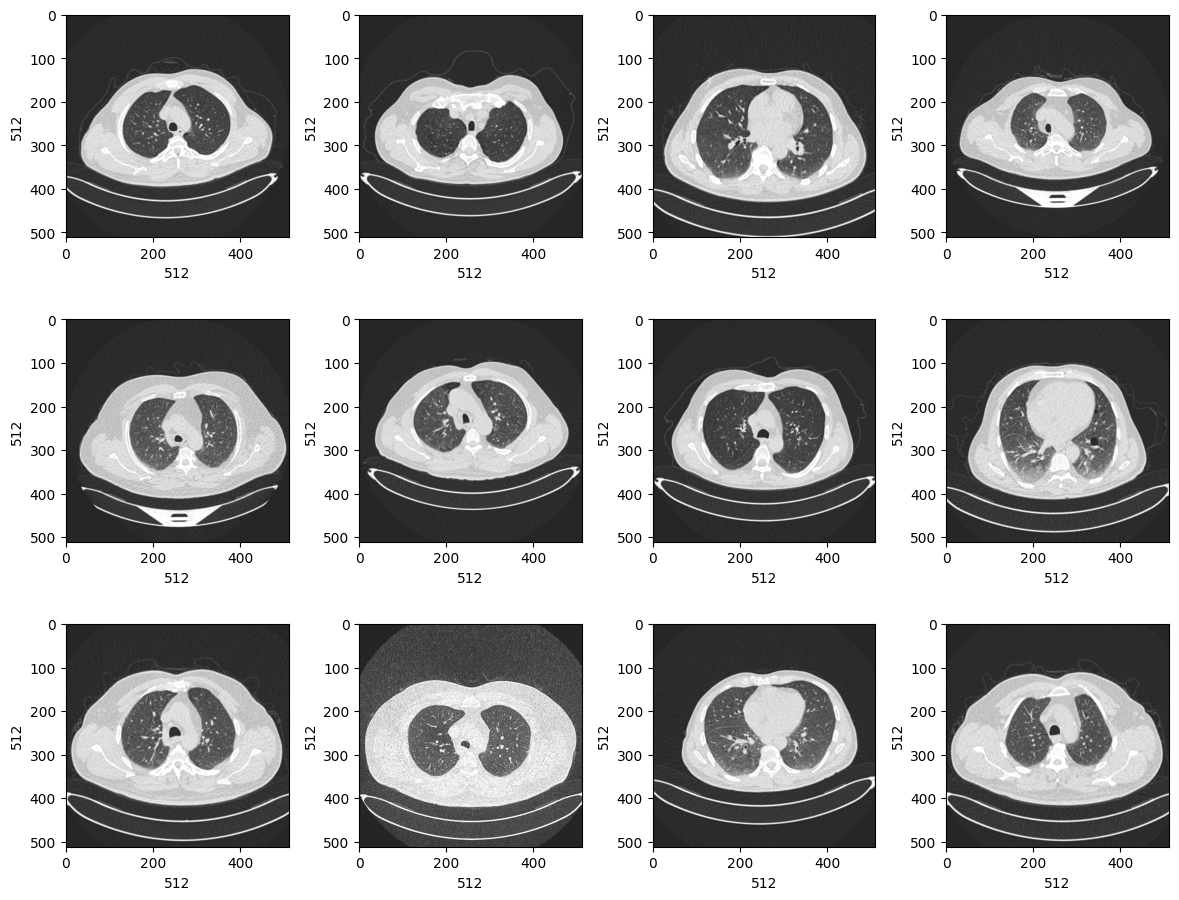

In [15]:
#Plotting 12 Image to Check Bengin Cases Images

plt.figure(figsize=(12,12))   #(row, column)
BenginPath = "/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Bengin cases"
for i in range(1,13):
  plt.subplot(4,4,i)  #(row, column, plot_count)
  plt.tight_layout()  #Adjust the padding between and around Subplots
  rand_img = imread(BenginPath +'/'+ random.choice(sorted(os.listdir(BenginPath))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize = 10)  #Width of Image
  plt.ylabel(rand_img.shape[0], fontsize =10)  #Height of Image

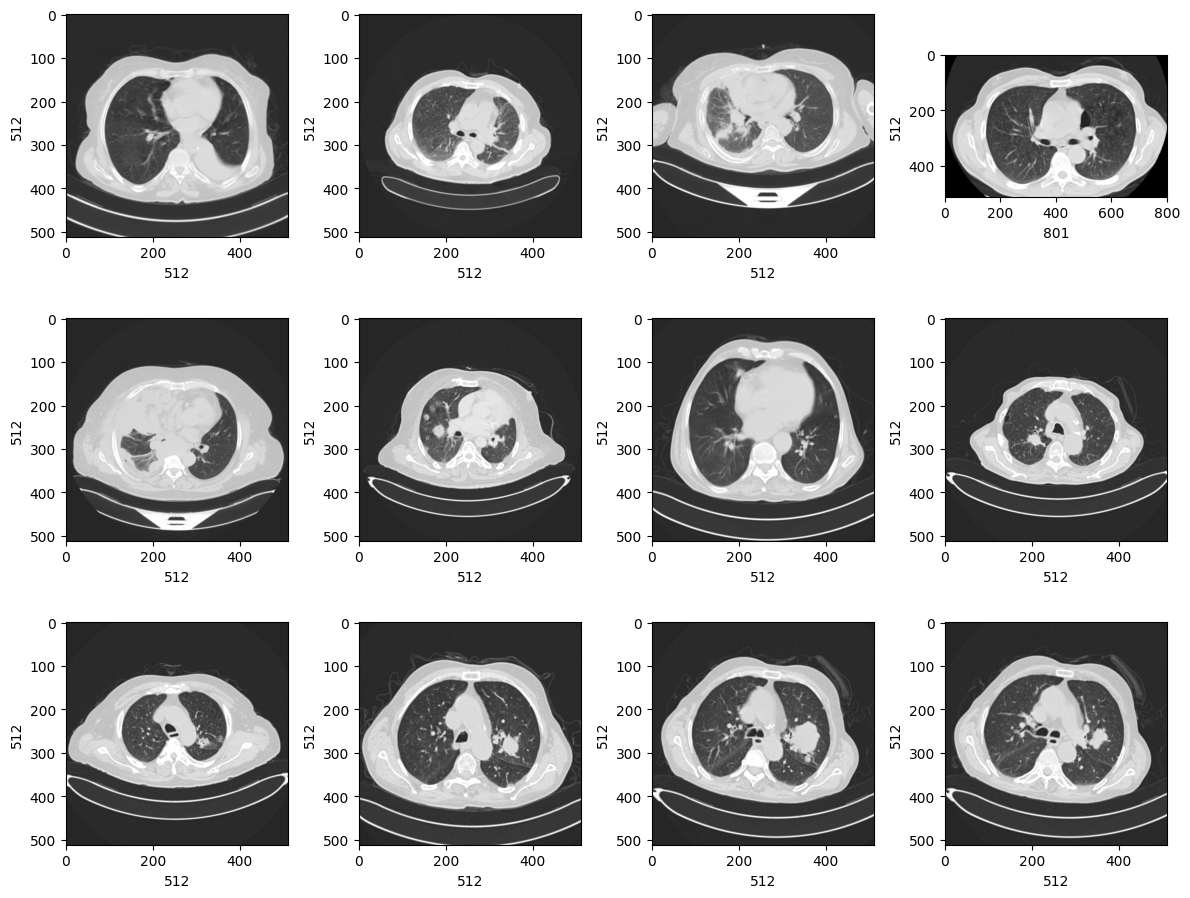

In [16]:
#Plotting 12 Image to Check Malignant Cases Images

plt.figure(figsize=(12,12))   #(row, column)
MalignantPath = "/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Malignant cases"
for i in range(1,13):
  plt.subplot(4,4,i)  #(row, column, plot_count)
  plt.tight_layout()  #Adjust the padding between and around Subplots
  rand_img = imread(MalignantPath +'/'+ random.choice(sorted(os.listdir(MalignantPath))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize = 10)  #Width of Image
  plt.ylabel(rand_img.shape[0], fontsize =10)  #Height of Image

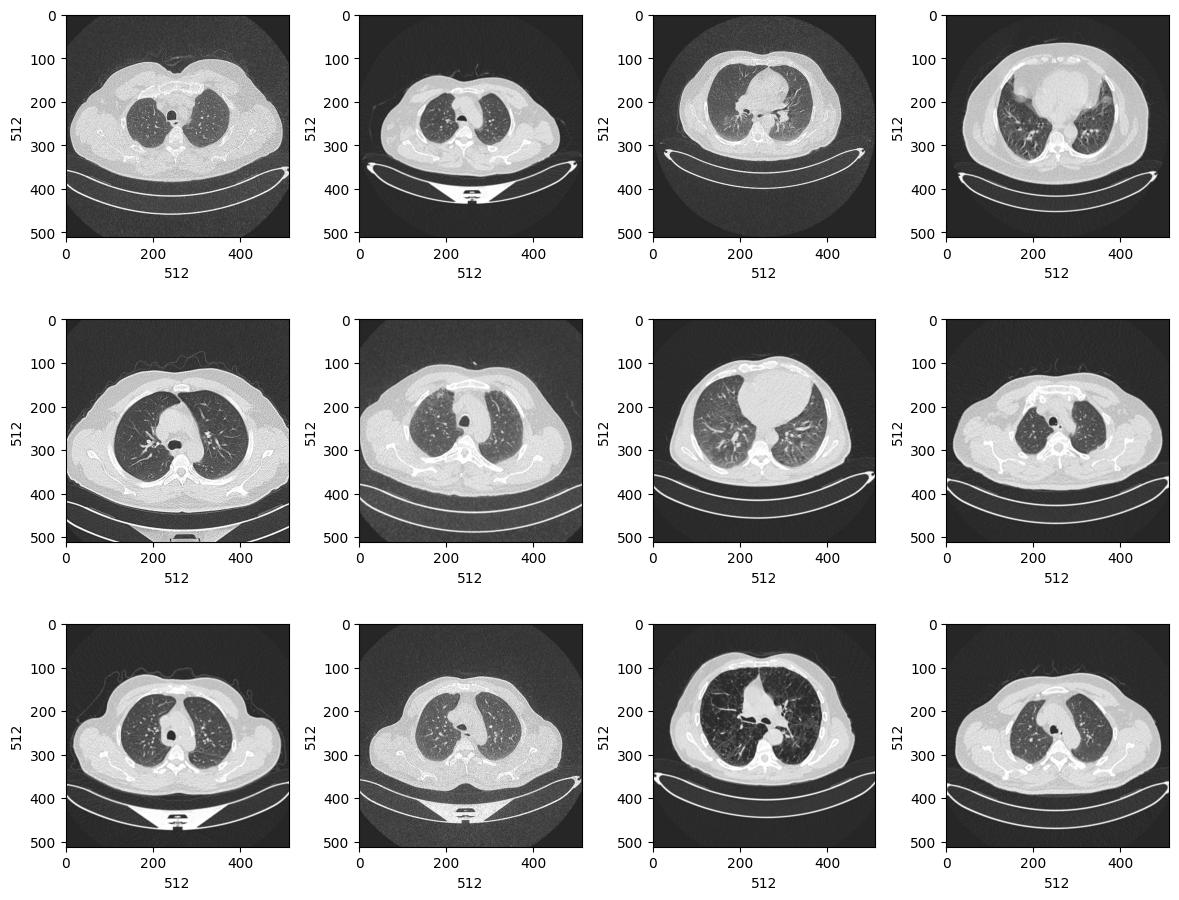

In [17]:
#Plotting 12 Image to Check Normal Cases Images

plt.figure(figsize=(12,12))   #(row, column)
NormalPath = "/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases"
for i in range(1,13):
  plt.subplot(4,4,i)  #(row, column, plot_count)
  plt.tight_layout()  #Adjust the padding between and around Subplots
  rand_img = imread(NormalPath +'/'+ random.choice(sorted(os.listdir(NormalPath))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize = 10)  #Width of Image
  plt.ylabel(rand_img.shape[0], fontsize =10)  #Height of Image

In [18]:
#Split the data to train and test
x_train, x_test, y_train, y_test = train_test_split(img_list, target_list, test_size=0.2, random_state = 42)
print(f'x_train shape is :', x_train.shape)
print(f'x_test.shape is :', x_test.shape)
print(f'y_train.shape is :', y_train.shape)
print(f'y_test.shape is :', y_test.shape)

x_train shape is : (877, 256, 256, 3)
x_test.shape is : (220, 256, 256, 3)
y_train.shape is : (877,)
y_test.shape is : (220,)


In [19]:
#Build the Model
#Create EfficientNetB7 Model
#Don't include_top layers to take only the features of the model
#Freeze all layer weights of the model
#Append my own layers for Transfer Learning
#Compile my own model after Transfer Learning

EFB7model = tf.keras.applications.efficientnet.EfficientNetB7(
    include_top=False,
    weights='imagenet',
    input_shape=(*IMG_SHAPE, 3),
    classes=len(classes))

# Freeze the base_model
EFB7model.trainable = False

# Append my own layers on the top of the model for Transfer Learning
x = EFB7model.output

# 1st conv block
x = layers.Conv2D(256, 3, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.GlobalAveragePooling2D(keepdims = True)(x)

# 2nd conv block
x = layers.Conv2D(128, 3, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.GlobalAveragePooling2D(keepdims = True)(x)

# 1st FC layer
x = layers.Conv2D(64, 3, padding='same')(x)
x = layers.Flatten()(x)
x = layers.Dense(64)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

# 2nd FC layer
x = layers.Dense(32, activation = 'relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.Dropout(.2)(x)

x = layers.Dense(3, 'softmax')(x)

EfficientNetB7_model = keras.models.Model(inputs = EFB7model.input, outputs = x)


258076736/258076736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [20]:
#Compile a model with Optimizer --> Adam learning rate 0.001, loss --> sparse_categorical_crossentropy and metrics --> metrics.SparseCategoricalAccuracy

EfficientNetB7_model.compile(optimizer = optimizers.Adam(0.0001),
                          loss = losses.sparse_categorical_crossentropy,
                          metrics = [metrics.SparseCategoricalAccuracy()])

EfficientNetB7_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 256, 256, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 256, 256, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 256, 256, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 257, 257, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 128, 128, 64)   │          1,728 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 128, 128, 64)   │            256 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 128, 128, 64)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 128, 128, 64)   │            576 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 128, 128, 64)   │            256 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 128, 128, 64)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 64)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 64)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 16)       │          1,040 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand    

 Total params: 70,373,274 (268.45 MB)

 Trainable params: 6,274,627 (23.94 MB)

 Non-trainable params: 64,098,647 (244.52 MB)

In [ ]:
'''from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(EfficientNetB7_model, to_file='EfficientNetB7_Convnet.png', show_shapes=True, show_layer_names=True)
Image(filename='EfficientNetB7_Convnet.png')'''

In [21]:
#Train the model
history = EfficientNetB7_model.fit(x_train, y_train,
                                   batch_size=64,
                                   epochs= 80,
                                   verbose = 1,
                                   validation_data=(x_test, y_test))

Epoch 1/80
14/14 ━━━━━━━━━━━━━━━━━━━━ 199s 8s/step - loss: 0.8586 - sparse_categorical_accuracy: 0.6254 - val_loss: 1.0946 - val_sparse_categorical_accuracy: 0.6909
Epoch 2/80
14/14 ━━━━━━━━━━━━━━━━━━━━ 49s 751ms/step - loss: 0.5117 - sparse_categorical_accuracy: 0.8385 - val_loss: 1.0951 - val_sparse_categorical_accuracy: 0.5864
Epoch 3/80
14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 807ms/step - loss: 0.4454 - sparse_categorical_accuracy: 0.8605 - val_loss: 1.0930 - val_sparse_categorical_accuracy: 0.6545
Epoch 4/80
14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 807ms/step - loss: 0.3649 - sparse_categorical_accuracy: 0.8993 - val_loss: 1.0909 - val_sparse_categorical_accuracy: 0.5500
Epoch 5/80
14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 767ms/step - loss: 0.3379 - sparse_categorical_accuracy: 0.9226 - val_loss: 1.0895 - val_sparse_categorical_accuracy: 0.5591
Epoch 6/80
14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 799ms/step - loss: 0.3018 - sparse_categorical_accuracy: 0.9271 - val_loss: 1.0871 - val_sparse_categorical_accuracy: 0.5227


In [23]:
# Evaluate the model on the test data
test_loss, test_accuracy = EfficientNetB7_model.evaluate(x_test, y_test, verbose=0)

# Save the highest training accuracy results
highest_accuracy = max(history.history['sparse_categorical_accuracy'])
highest_val_accuracy = max(history.history['val_sparse_categorical_accuracy'])

# Print and save the results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Highest Training Accuracy: {highest_accuracy}")
print(f"Highest Validation Accuracy: {highest_val_accuracy}")

# You can save these results to a file or database as needed.
with open("results.txt", "w") as f:
  f.write(f"Test Loss: {test_loss}\n")
  f.write(f"Test Accuracy: {test_accuracy}\n")
  f.write(f"Highest Training Accuracy: {highest_accuracy}\n")
  f.write(f"Highest Validation Accuracy: {highest_val_accuracy}\n")


Test Loss: 0.16951151192188263
Test Accuracy: 0.9590908885002136
Highest Training Accuracy: 1.0
Highest Validation Accuracy: 0.9863636493682861


In [26]:
EfficientNetB7_model.save("LungCancerDetection_Model_B64E80.h5")

#Serialize Model to JSON
json_model = EfficientNetB7_model.to_json()

#Save the Model Architecture to JSON File
with open('LungCancerDetection_Model_B64E80.json', 'w') as json_file:
  json_file.write(json_model)

#Saving the Weights of the Model
EfficientNetB7_model.save_weights("LungCancerDetection_Model_B64E80_weights.weights.h5")

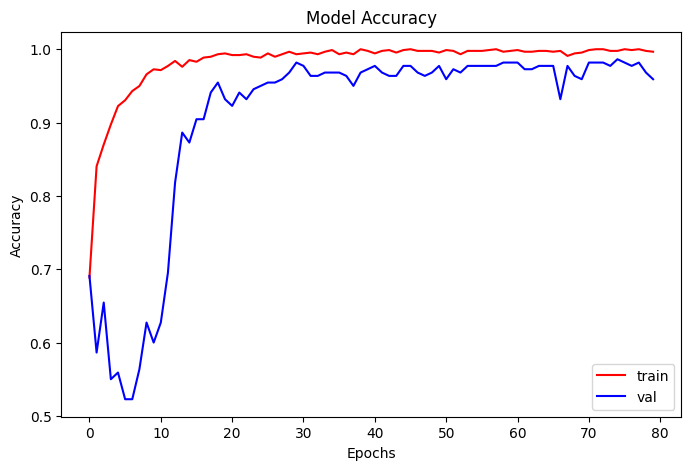

In [27]:
#Plot the training History

plt.figure(figsize = (8,5))
plt.plot(history.history['sparse_categorical_accuracy'], color = 'r')
plt.plot(history.history['val_sparse_categorical_accuracy'], color = 'b')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])
plt.show()

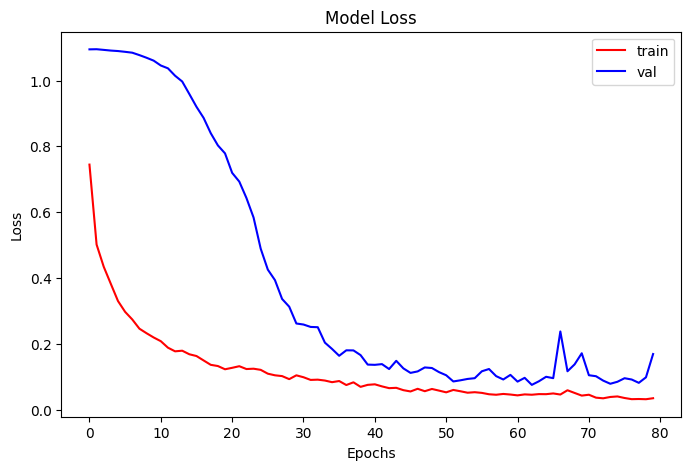

In [28]:
#Plot the training History

plt.figure(figsize = (8,5))
plt.plot(history.history['loss'], color = 'r')
plt.plot(history.history['val_loss'], color = 'b')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.show()

In [29]:
#Evaluate the model
print("[INFO] Calcuating Model Accuracy")
scores = EfficientNetB7_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calcuating Model Accuracy
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 287ms/step - loss: 0.1156 - sparse_categorical_accuracy: 0.9689
Test Accuracy: 95.90908885002136


In [30]:
#Create classification report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = EfficientNetB7_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))

7/7 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step
              precision    recall  f1-score   support

           0       0.95      0.69      0.80        26
           1       1.00      1.00      1.00       117
           2       0.90      0.99      0.94        77

    accuracy                           0.96       220
   macro avg       0.95      0.89      0.91       220
weighted avg       0.96      0.96      0.96       220



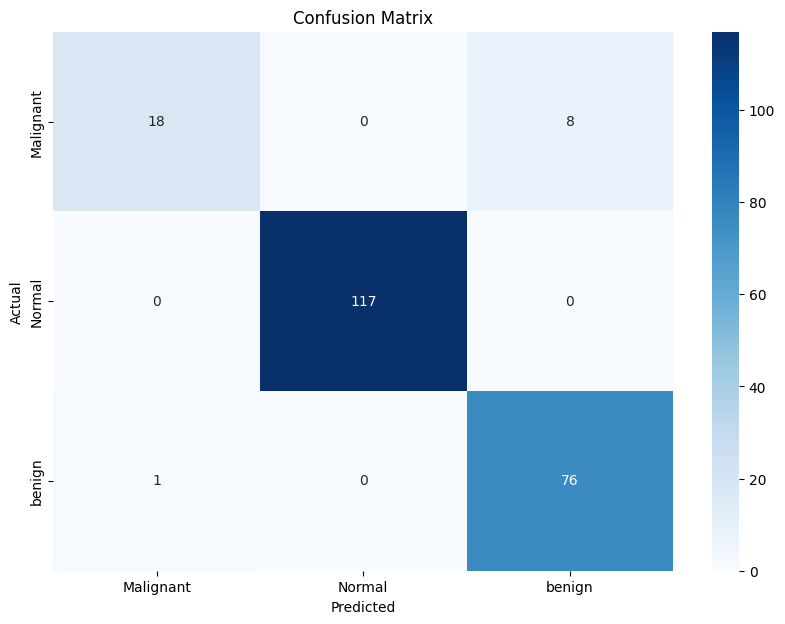

In [31]:
#Create Confusion Metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

class_labels = ['Malignant', 'Normal', 'benign']

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues')

plt.xticks(ticks=[0.5, 1.5, 2.5], labels=class_labels)
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.title("Confusion Matrix")

plt.show()

In [ ]:
'''os.remove("/kaggle/working/state.db")'''

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 278ms/step


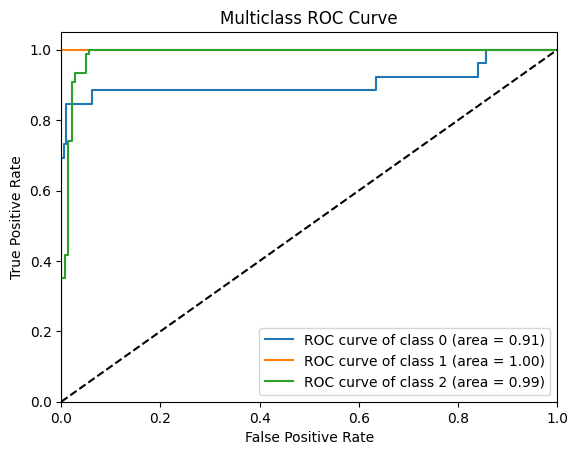

In [33]:
# Create ROC Curve

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Predict the probabilities for the test set
y_pred = EfficientNetB7_model.predict(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred[:, i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.show()